<a href="https://colab.research.google.com/github/yasith46/Machine-Learning/blob/main/EN3150_Assignment_01_Learning_from_data_and_related_challenges_and_linear_models_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Learning From Data
###Generating Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 10000

# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [:, np.newaxis]

###Data Visualisation

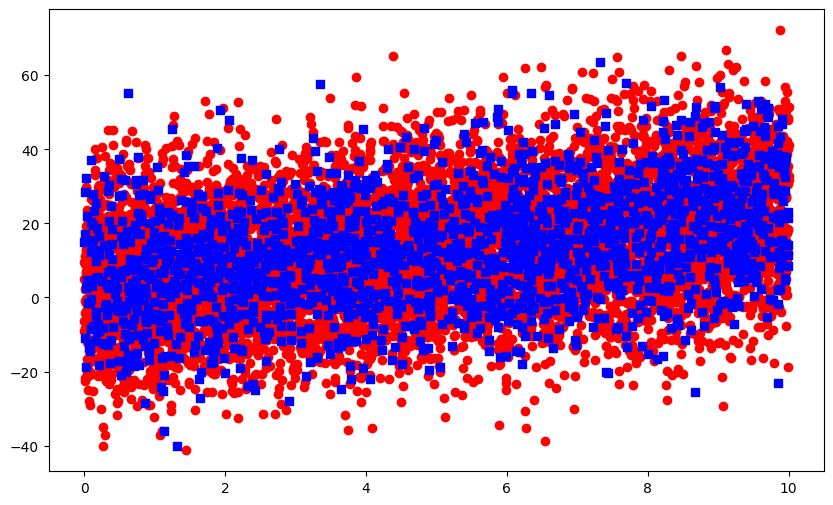

In [ ]:
r = np.random.randint(104)

# Split the data into training and test sets (80% train ,20% test )
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = r)

# Plot the data points
plt.figure(figsize =(10 , 6))
plt.scatter(X_train, Y_train, alpha =1, marker ='o', color ='red', label ='Training Data')
plt.scatter(X_test, Y_test, alpha =1, marker ='s', color ='blue', label ='Testing Data')
plt.show()

Here as we choose the `random_state=r` with a random integer, the split of the samples is randomised and different from time to time.

###Linear Regression

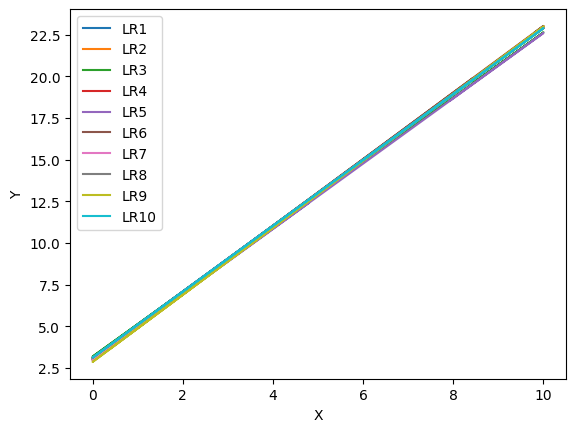

In [ ]:
for i in range (10): # Plotting 10 different instances
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=np.random.randint(104))

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f'LR{i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Here, as we use a random number for the random state in the test-train split, the train data wiill be different each time. Therefore, the linear regression model will be different each iteration.

Here when there is 10000 samples in the dataset, the linear regression model for different iterations appear to be much closer than when theres only 100. This is due to the high number of sample points reducing the variance, increasing the accuracy of identifying the trend by the model.



---



##Linear Regression on the real world data

###Loading Data
Importing the code

In [2]:
!pip install ucimlrepo

In [3]:
# If package not installed , install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id =925)

# data (as pandas dataframes )
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print("Metadeta :")
print(infrared_thermography_temperature.metadata)
print("\nVariables:")
# variable information
print(infrared_thermography_temperature.variables)

Metadeta :
{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_c

###Independent and Dependent Variables

Here there are 2 dependent variables (targets), and 33 independent variables (features)

###Working with Categorical Data

Here since there are categorical data, we can't apply linear regression directly to this. We can take a few steps in order to convert these into numerical data.

1.   **Remove categorical data**: This can be done in cases where the data being removed are not crucial. However here the categorigal data are Gender, Age Group and Race. These can be crucial when it comes to measuring the temperature due to the changes in the bodies.

2.   **Label Encoding**: This is when each category in the feature are assigned a number. Eventhough this is a simple method, this can result poorly in some algorithms as the numerical relationships can mislead the model.

3.   **One-hot Encoding**: This is when each category in the feature is considered as a new feature, where the samples having that feature would get a 1 in that feature and others a 0. Envethough this will remove the numerical relationship in Label Encoding, it will increase the dimensionality, making the model harder to interpret.



In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Let's combine to a single datafram
df = pd.concat([X,y], axis=1)

categorical_cols = ['Gender','Age','Ethnicity']

# Initialize a label encoder
label_encoders = {}

# Apply label encoding to each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformations

#Seperate back X and y
X = df[X.columns]
y = df[y.columns]

print("No of features: ",len(X.columns))

No of features:  33


###Removing NaN / Missing Values

Dropping the NaN or Missing values is an approach that needs to be done carefully, as it can lead to dropping important information. Dropping an entire feature as in the above code might lead to a less accurate model.

However in the approch given in the above code, it will lead to problems. When the x values and y values are dropped individually, there will most likely be misalignments of the data after the operation. So the code given is a wrong approach. A better approach would be to do as follows:

In [5]:
# Get into  a dataframe
df = pd.concat([X,y],axis=1)

# Drop rows having missing values
df = df.dropna()

#Seperate back X and y
X = df[X.columns]
y = df[y.columns]

###Choosing Target and the Features
choose `aveOralM` as the dependent variable

In [6]:
y = y.aveOralM

Now let's select 3 features other than Age to make the model. In order to get a better insight let's plot these.

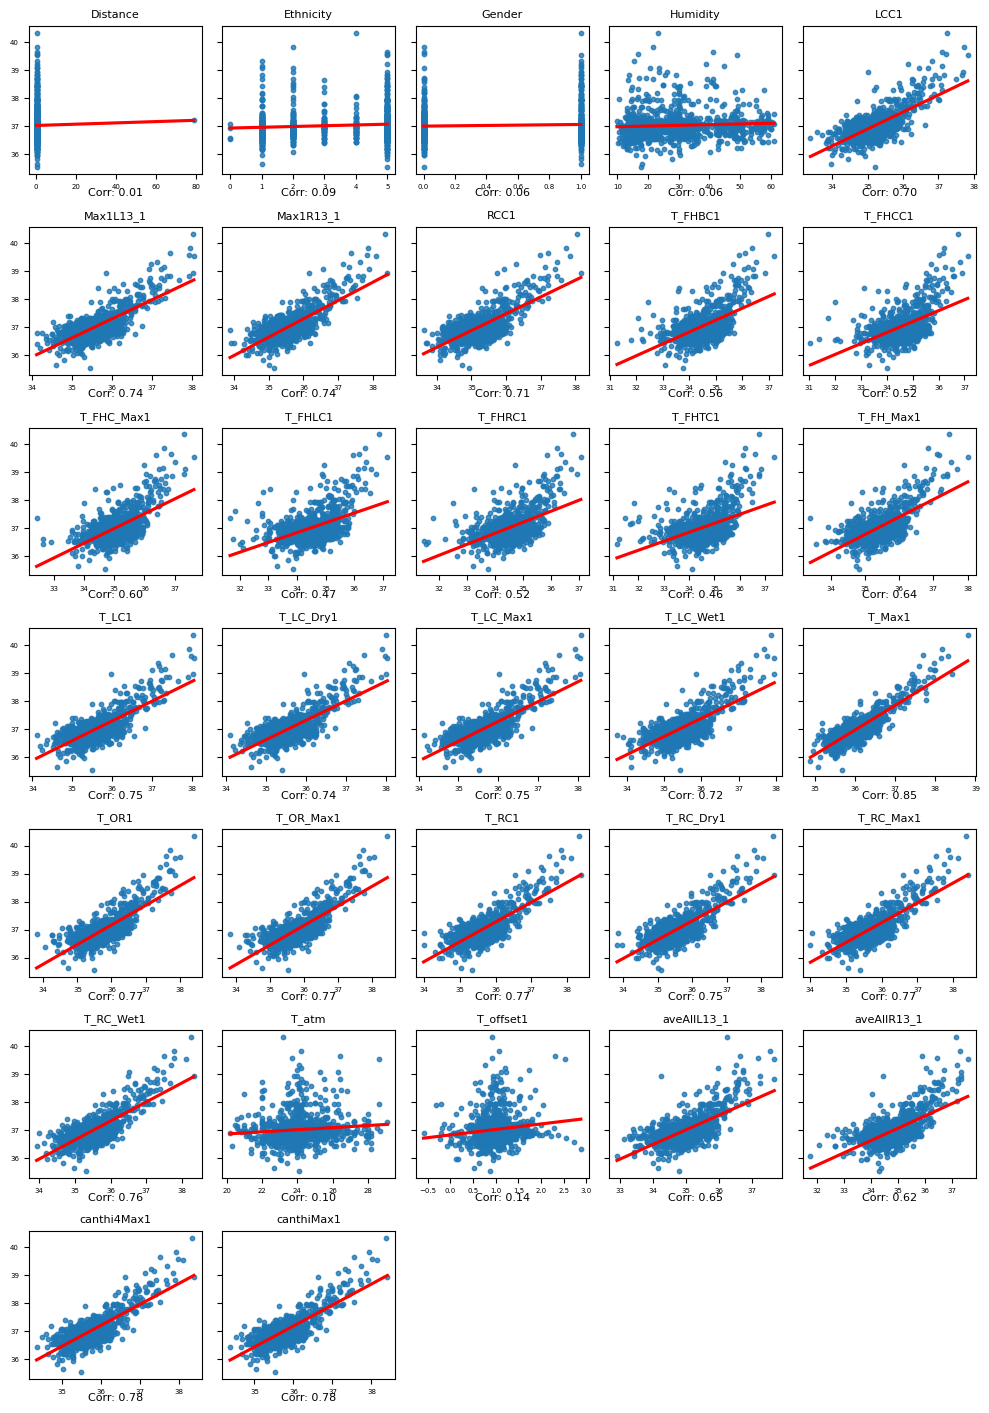

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# remove age columns
plot_columns = X.columns.difference(['Age'])

# Plotting
fig, axes = plt.subplots(8, 5, figsize=(10, 8 * 2), sharey=True)
axes = axes.flatten()

for i, feature in enumerate(plot_columns):
    sns.regplot(x=X[feature], y=y, ax=axes[i], scatter_kws={'s': 10}, line_kws={'color': 'red'}, ci=None)
    correlation = X[feature].corr(y)
    axes[i].set_title(f'{feature}', fontsize=8)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].text(0.5, -0.15, f'Corr: {correlation:.2f}', fontsize=8, ha='center', transform=axes[i].transAxes)
    axes[i].tick_params(axis='both', which='major', labelsize=5)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here looking at the results, we can see that T_Max1, canthi4Max1, canthiMax1 as they seem to have the strongest correlation with the y value. Other categorical data here does not seem to give that much of an insight into y.

### Splitting Train-Test Set, Training the Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Choosing the selected features
X1 = X[['Age', 'T_Max1', 'canthi4Max1', 'canthiMax1']]

# Split test-train data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=1)

# Creating a model
model1 = LinearRegression()
model1.fit(X1_train, y_train)

# Coefficients
coefficients = model1.coef_
print(coefficients)
bias1 = model1.intercept_
print("Bias = ", bias1)

[ 0.01058044  0.82228467  0.31473044 -0.26844167]
Bias =  5.697490557193255


### Highest Contributing Feature
Here as we can see, `T_Max1` contributes the most to the target

###Training the Model with T OR1, T OR Max1, T FHC Max1, T FH Max1

In [80]:
X2 = X[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]

# Train test split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=1)

# Creating the model
model2 = LinearRegression()
model2.fit(X2_train, y_train)

# Coefficients
coefficients2 = model2.coef_
print(coefficients2)
bias2 = model2.intercept_
print("Bias = ", bias2)

[-0.52891705  1.06903832 -0.04303048  0.30755851]
Bias =  8.267472723851043


###Finding Errors
####RSS

In [81]:
# Predict
y_preds2 = model2.predict(X2_test)

# Finding RSS value
residuals = y_test - y_preds2
rss = (residuals**2).sum()

print("RSS = ", rss)

RSS =  19.554813706599653


####RSE

In [82]:
import numpy as np

rse = np.sqrt(rss/(X2_test.shape[0]-4-1))
print("RSE = ", rse)

RSE =  0.31347311768403846


####MSE

In [83]:
mse = (residuals**2).mean()
print("MSE = ", mse)

MSE =  0.09585692993431202


####R$^2$ Statistic

In [84]:
tss = ((y_test - y_test.mean())**2).sum()
r2 = 1 - rss/tss

print("R2 = ", r2)

R2 =  0.70061092801715


####Standard Errors

In [85]:
# RSE is the standar error for the residuals
# For bias term
se_0 = np.sqrt((rse**2) * (1/(X2_train.shape[0]) + (X2_train.mean().mean()**2) / (((X2_train - X2_train.mean().mean()) ** 2).sum().sum())))
print("se_0 = ",se_0)

se_1 = np.sqrt((rse**2)/((X2_train['T_OR1']-X2_train['T_OR1'].mean())**2).sum())
print("se_1 = ",se_1)

se_2 = np.sqrt((rse**2)/((X2_train['T_OR_Max1']-X2_train['T_OR_Max1'].mean())**2).sum())
print("se_2 = ",se_2)

se_3 = np.sqrt((rse**2)/((X2_train['T_FHC_Max1']-X2_train['T_FHC_Max1'].mean())**2).sum())
print("se_3 = ",se_3)

se_4 = np.sqrt((rse**2)/((X2_train['T_FH_Max1']-X2_train['T_FH_Max1'].mean())**2).sum())
print("se_4 = ",se_4)

se_0 =  0.31255740065185345
se_1 =  0.019837842701557685
se_2 =  0.01982760810090145
se_3 =  0.01937229858231367
se_4 =  0.02173314429657688


####t-statistic

In [88]:
# For bias
t_0 = bias2/se_0
print("t_0 = ",t_0)

# For the rest of the features
t_1 = coefficients2[0]/se_1
print("t_1 = ",t_1)

t_2 = coefficients2[1]/se_2
print("t_2 = ",t_2)

t_3 = coefficients2[2]/se_3
print("t_3 = ",t_3)

t_4 = coefficients2[3]/se_4
print("t_4 = ",t_4)

t_0 =  26.451054131525385
t_1 =  -26.66202466690879
t_2 =  53.916655581134414
t_3 =  -2.2212376968860394
t_4 =  14.151588108732401


####p-values
> Source: https://stackoverflow.com/a/69146999



In [97]:
from scipy.stats import t

# Degree of freedom
df = X2_train.shape[0] - 4 - 1

# calculating p value
p_0 = 2*(1-t.cdf(abs(t_0), df))
print("p0 = ",p_0)

p_1 = 2*(1-t.cdf(abs(t_1), df))
print("p1 = ",p_1)

p_2 = 2*(1-t.cdf(abs(t_2), df))
print("p2 = ",p_2)

p_3 = 2*(1-t.cdf(abs(t_3), df))
print("p3 = ",p_3)

p_4 = 2*(1-t.cdf(abs(t_4), df))
print("p4 = ",p_4)

p0 =  0.0
p1 =  0.0
p2 =  0.0
p3 =  0.026610983469185
p4 =  0.0
